<img src="images/00-mathematics_with_python.png" style="height:250px" align="left">

<!--NAVIGATION-->
< [3.x](3x.ipynb) | [3.x](3x.ipynb) >

# 3.x Direction Field

<div class="alert alert-block alert-warning">
    
<b>Example</b>

Let us consider the ordinary differential equation
    
$$
    y'(x) = \frac{-x}{y} \, .
$$  
</div>

(np.float64(-3.85), np.float64(3.85), np.float64(-3.85), np.float64(3.85))

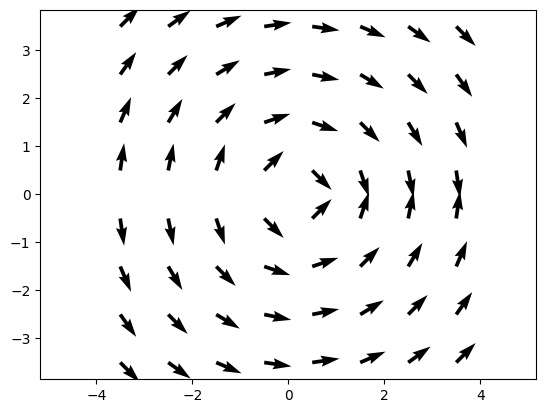

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
# direction field with numpy and quiver
#
x = np.linspace(-3.5,3.5,8)
y = np.linspace(-3.5,3.5,8)
X,Y = np.meshgrid(x,y)

U = np.ones_like(X)
V = -X/Y

# normalize
n = np.sqrt(U**2 + V**2)
U = U/n
V = V/n

plt.quiver(X,Y,U,V)
fig = plt.gcf()
ax = plt.gca()
ax.axis('equal')

In [7]:
#
# symbolic solution with sympy
#
x = sp.Symbol('x')
y = sp.Function('y')(x)
yp = sp.Derivative(y)
ode = sp.Eq(yp,-x/y)
x0, y0 = -3.0, 1.0
sym_sol = sp.dsolve(ode, ics = {y.subs(x,x0) : y0})
print(sym_sol)

Eq(y(x), 3.16227766016838*sqrt(1 - 0.1*x**2))


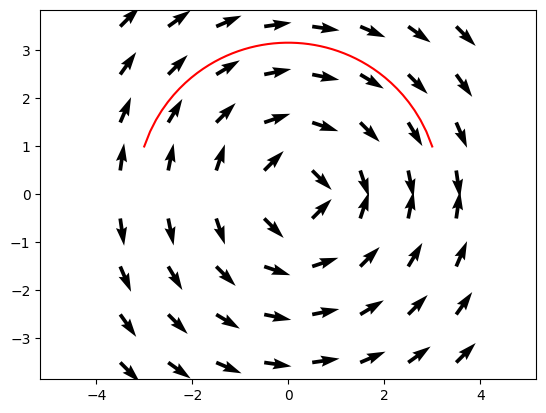

In [8]:
#
# convert the symbolical solution to a numerical solution
#
num_sol = sp.lambdify(x,sym_sol.rhs)
x = np.linspace(x0,-x0)
y = num_sol(x)
ax.plot(x,y,'-r')
display(fig)